In [705]:
import pandas as pd
from model.PrepareData import PrepareData
import re
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [706]:
topn = 50
ngrams = [1,2,3,4]

In [707]:
def raw_chords_to_df(tunes, remove_root=False):
  tunes_chords = [item for tune in tunes for item in tune]

  if remove_root:
    tunes_chords = [re.sub('[A-G][#b]?', '*', chord) for chord in tunes_chords]

  counts = Counter(tunes_chords)
  _df = pd.DataFrame(counts.items(),
                    columns=['chord', 'count']).sort_values(by='count', ascending=False)

  return _df


In [708]:
def plot_zipf(chords):
    counter_of_words = chords.set_index('chord').to_dict(orient='dict')
    counter_of_words = Counter(counter_of_words['count'])

    word_counts = sorted(counter_of_words.values(), reverse=True)
    frequency_rank = np.array(list(range(1, len(word_counts) + 1)))

    plt.figure(figsize=(20, 3))

    plt.subplot(1, 2, 1)

    n = 30
    df_top = df_chords_top.head(n)
    plt.bar(df_top['chord'], np.log(df_top['count']))
    plt.xlabel('')
    plt.ylabel('Absolute Counts (log)')
    plt.title(f'Top {n} Most Frequent Chords in the Corpus')
    ax = plt.gca()
    ax.set_xticklabels(labels=df_chords_top['chord'],rotation=90)

    plt.subplot(1, 2, 2)

    plt.scatter(np.log(frequency_rank), np.log(word_counts))
    plt.xlabel('Frequency Rank of Token (log)')
    plt.ylabel('Absolute Count of Token (log)')
    plt.title('Zipf Plot for Chord Frequencies')

    #plt.savefig('plot.png')
    return plt


In [709]:
def corpus_chord_ngram(obj, ngrams):
    _df = pd.DataFrame(columns=['sectionid', 'chords'])
    list_corpus_chords = []
    list_sectionid = []

    # for each unique section of a tune, process the chords
    for _id, line in obj.df_section.iterrows():
        sectionid = line['sectionid']
        tune_n = obj.preprocess_input(line['chords'], ngrams=ngrams)

        list_corpus_chords.append(tune_n)
        list_sectionid.append(sectionid)

    _df = pd.DataFrame(list(zip(list_sectionid, list_corpus_chords)),
                       columns=['sectionid', 'chords'])
    _df = _df.set_index('sectionid')
    return _df

# Read Full Chords

In [710]:
chords_preprocess = 'chordsFull'
prep = PrepareData(chords_preprocess, ngrams=ngrams)
df = corpus_chord_ngram(prep, prep.ngrams)
df = df['chords']

Train Corpus: 3078
Test Corpus: 180


### Prepare Overview for Full Chords, any Root

In [711]:
df_chords = raw_chords_to_df(df)
df_chords.head()

,chord,count
5,G7,4838
14,Dm7,3960
0,CM7,2590
29,Dm7-G7,2555
207,C,2129


In [712]:
df_chords.tail()

,chord,count
16961,G9-Gaug7-Em7,1
16960,G9-G9-Gaug7,1
16959,G7-G9-G9,1
16958,Ebdim7-G7-G9,1
37787,Em-B7-Dm7-G7,1


C:\Users\doris\AppData\Local\Temp/ipykernel_13580/2662149279.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\envs\\chords\\lib\\site-packages\\matplotlib\\pyplot.py'>

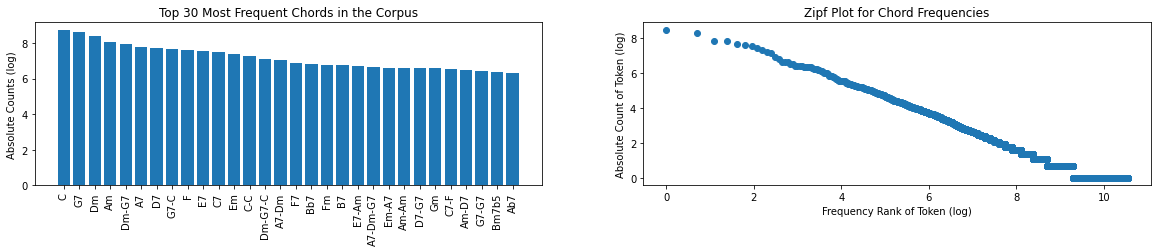

In [713]:
plot_zipf(df_chords)


In [714]:
df_chords.sort_values(by=['count'], ascending=False, inplace=True)
#df_chords_top = df_chords.query('count > 100')
df_chords_top = df_chords.head(topn)

fig = px.bar(df_chords_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords<br><sup>Only the top {topn} chords are shown</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()



### Prepare Overview for Full Chords, Roots removed

In [715]:
df_noroot = raw_chords_to_df(df, remove_root=True)
df_noroot.head(50)


,chord,count
1,*7,13830
2,*m7,9830
6,*m7-*7,5485
0,*M7,4905
125,*7-*7,4422
108,*,3213
5,*7-*m7,2828
133,*7-*7-*7,2486
10,*7-*m7-*7,2078
30,*m7-*m7,2078


In [716]:
df_noroot.head(10)

,chord,count
1,*7,13830
2,*m7,9830
6,*m7-*7,5485
0,*M7,4905
125,*7-*7,4422
108,*,3213
5,*7-*m7,2828
133,*7-*7-*7,2486
10,*7-*m7-*7,2078
30,*m7-*m7,2078


In [717]:
df_noroot.sort_values(by=['count'], ascending=False, inplace=True)
df_noroot_top = df_noroot.head(topn)

if len(df_noroot_top) > topn:
    text = f'Only the top {topn} chords are shown.'
else:
    text = f'All chords are shown.'


fig = px.bar(df_noroot_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords, with Root removed<br><sup>{text}</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()


# Read Simplified Chords

In [718]:
chords_preprocess = 'chordsSimplified'
prep = PrepareData(chords_preprocess, ngrams=ngrams)
df = corpus_chord_ngram(prep, prep.ngrams)
df = df['chords']

Train Corpus: 3078
Test Corpus: 180


### Prepare Overview for Simplified Chords, any Root

In [719]:
df_chords = raw_chords_to_df(df)
df_chords.head()


,chord,count
5,G7,5427
14,Dm7,4047
29,Dm7-G7,2764
0,CM7,2669
89,A7,2415


C:\Users\doris\AppData\Local\Temp/ipykernel_13580/2662149279.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\envs\\chords\\lib\\site-packages\\matplotlib\\pyplot.py'>

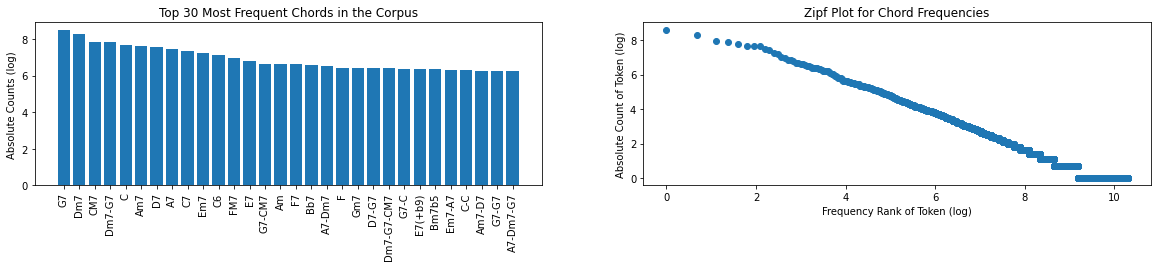

In [720]:
plot_zipf(df_chords)


In [721]:
df_chords.sort_values(by=['count'], ascending=False, inplace=True)
df_chords_top = df_chords.head(topn)

fig = px.bar(df_chords_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords<br><sup>Only the top {topn} chords are shown.</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()

### Prepare Overview for Simplified Chords, Roots removed

In [722]:
df_noroot = raw_chords_to_df(df, remove_root=True)

In [723]:
df_noroot.head(10)

,chord,count
1,*7,17461
2,*m7,10230
6,*m7-*7,6415
37,*7-*7,5588
0,*M7,5256
5,*7-*m7,4044
91,*,3393
114,*7-*7-*7,3078
10,*7-*m7-*7,3008
29,*m7-*m7,2270


In [724]:
df_noroot.sort_values(by=['count'], ascending=False, inplace=True)
df_noroot_top = df_noroot.head(topn)

if len(df_noroot_top) > topn:
    text = f'Only the top {topn} chords are shown.'
else:
    text = f'All chords are shown.'


fig = px.bar(df_noroot_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords, with Root removed<br><sup>{text}</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()




# Read Basic Chords

In [725]:
chords_preprocess = 'chordsBasic'
prep = PrepareData(chords_preprocess, ngrams=ngrams)
df = corpus_chord_ngram(prep, prep.ngrams)
df = df['chords']

Train Corpus: 3078
Test Corpus: 180


### Prepare Overview for Basic Chords, any Root

In [726]:
df_chords = raw_chords_to_df(df)
df_chords.head()


,chord,count
0,C,6166
5,G7,5566
14,Dm,4396
12,Am,3172
29,Dm-G7,2860


C:\Users\doris\AppData\Local\Temp/ipykernel_13580/2662149279.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\envs\\chords\\lib\\site-packages\\matplotlib\\pyplot.py'>

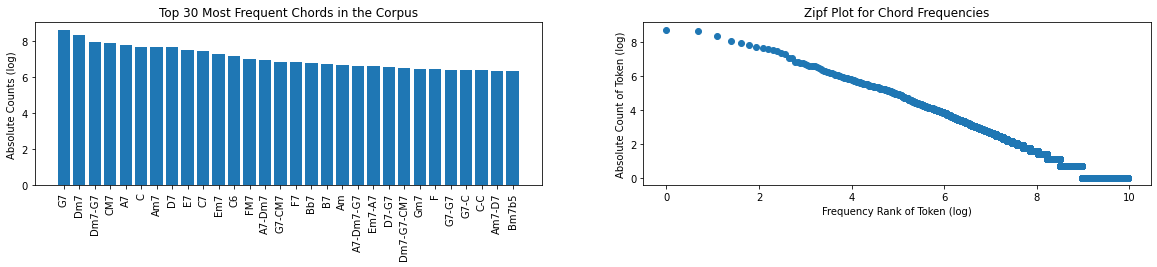

In [727]:
plot_zipf(df_chords)


In [728]:
df_chords.sort_values(by=['count'], ascending=False, inplace=True)
df_chords_top = df_chords.head(topn)

fig = px.bar(df_chords_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords<br><sup>Only the top {topn} chords are shown.</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()

### Prepare Overview for Basic Chords, Roots removed

In [729]:
df_noroot = raw_chords_to_df(df, remove_root=True)

In [730]:
df_noroot.head(10)

,chord,count
1,*7,18045
2,*m,12413
0,*,10403
6,*m-*7,7183
37,*7-*7,5928
5,*7-*m,4818
4,*7-*,4295
10,*7-*m-*7,3399
29,*m-*m,3366
96,*7-*7-*7,3284


In [731]:
df_noroot.sort_values(by=['count'], ascending=False, inplace=True)
df_noroot_top = df_noroot.head(topn)

if len(df_noroot_top) > topn:
    text = f'Only the top {topn} chords are shown.'
else:
    text = f'All chords are shown.'


fig = px.bar(df_noroot_top,
             x='chord',
             y='count',
             log_y=True,
             width=600, height=300,
             )
fig.update_layout(
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    title={'text': f"Absolute Counts of {chords_preprocess} Chords, with Root removed<br><sup>{text}</sup>",
           'font': {'size': 12}
           },
    xaxis_title="",
    yaxis_title="Count (logarithmic)",
    margin=dict(l=0, r=20, t=20, b=20),
    font=dict(
        #family="Courier New, monospace",
        size=8,
        #color="RebeccaPurple"
    ),
    plot_bgcolor="white",
)
fig.show()


